In [49]:
import swat as sw
from pprint import pprint

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import pandas as pd
import swat.datamsghandlers as dmh

In [50]:
def imageShow(casTable, imageId, nimages):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,to=nimages)
    fig = plt.figure(figsize=(20, 20))
    for i in range(nimages):
        imageData = a['Fetch'].ix[ i][ imageId]
        img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
        fig.add_subplot(1,nimages,i+1)
        plt.imshow(img_np)
        img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
        plt.xticks([]), plt.yticks([])
        
def imageShowResults(casTable, imageId, nimages):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'score', 'order':'DESCENDING'}],table=casTable,to=nimages)
    fig = plt.figure(figsize=(20, 20))
    for i in range(nimages):
        imageData = a['Fetch'].ix[ i][ imageId]
        img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
        fig.add_subplot(1,nimages,i+1)
        plt.imshow(img_np)
        img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
        plt.xticks([]), plt.yticks([])
        
def imageShowStartingFrom(casTable, imageId, nimages, startId):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,from_=startId, to=nimages)
    fig = plt.figure(figsize=(20, 20))
    for i in range(startId, nimages):
        imageData = a['Fetch'].ix[ i][ imageId]
        img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
        fig.add_subplot(1,(nimages-startId),i-startId+1)
        plt.imshow(img_np)
        img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
        plt.xticks([]), plt.yticks([])
                
        
def showParticularImage(casTable, imageId, nimages, rowId):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,to=nimages)
    imageData = a['Fetch'].ix[ rowId][ imageId]
    img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
    fig = plt.figure(figsize=(20, 20))
    plt.imshow(img_np)
    img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()  
    
    
def imageShow2(casTable, resId, formatId, sizeId, imageId, nimages):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,to=nimages)
    fig = plt.figure(figsize=(20,20))
    for i in range(nimages):
        wh = (a['Fetch'].ix[ i][resId]).ljust(16, b'\x00')
        res = np.fromstring( wh, np.int64)
        width = res[0]
        height = res[1]
        imageType = a['Fetch'].ix[ i][formatId]
        size = a['Fetch'].ix[ i][sizeId]
        img_pre = (a['Fetch'].ix[ i][imageId]).ljust( size, b'\x00')
        fig.add_subplot(1,nimages,i+1)
        if( imageType == 0):
            img_np = np.fromstring(img_pre, np.uint8)
            img_np = img_np.reshape( (height, width) )
            img = Image.fromarray(img_np)
            plt.imshow(img, cmap='gray')
        elif( imageType == 16):
            img_np = np.fromstring(img_pre, np.uint8)
            img_np = img_np.reshape( (height, width, 3))
            img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
            img = Image.fromarray(img_np)  
            plt.imshow(img)
        elif( imageType == 5):
            img_np = np.fromstring(img_pre, np.float32)
            img_np = img_np.reshape( (height, width))
            cv2.normalize(img_np, img_np, 0, 255, cv2.NORM_MINMAX)
            img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
            img_np = np.uint8( img_np)
            plt.imshow(img_np, cmap='gray')
        elif( imageType == 21):
            img_np = np.fromstring(img_pre, np.float32)
            img_np = img_np.reshape( (height, width, 3))
            cv2.normalize(img_np, img_np, 0, 255, cv2.NORM_MINMAX)
            img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
            img_np = np.uint8( img_np)
            plt.imshow(img_np)
        elif( imageType == 6):
            img_np = np.fromstring(img_pre, np.double)
            img_np = img_np.reshape( (height, width))
            cv2.normalize(img_np, img_np, 0, 255, cv2.NORM_MINMAX)
            img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
            img_np = np.uint8( img_np)
            plt.imshow(img_np, cmap='gray')
        elif( imageType == 22):
            img_np = np.fromstring(img_pre, np.double)
            img_np = img_np.reshape( (height, width, 3))
            cv2.normalize(img_np, img_np, 0, 255, cv2.NORM_MINMAX)
            img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
            img_np = np.uint8( img_np)
            plt.imshow(img_np)
        elif( imageType == 2):
            img_np = np.fromstring(img_pre, np.uint16)
            img_np = img_np.reshape( (height, width))
            img = Image.fromarray(img_np)
            plt.imshow(img, cmap='gray')
        elif( imageType == 18):
            img_np = np.fromstring(img_pre, np.uint16)
            img_np = img_np.reshape( (height, width, 3))
            img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
            img = Image.fromarray(img_np)
            plt.imshow(img)
        
        plt.xticks([]), plt.yticks([])
        #plt.show()  

In [51]:
s = sw.CAS('cas01.unx.sas.com', 13596)
s.loadactionset('image')

NOTE: Added action set 'image'.


[actionset]

 u'image'

+ Elapsed: 0.0114s, user: 0.01s, sys: 0.005s, mem: 0.31mb

In [52]:
s.image.loadimages(casout={'name':'slides'},path='/u/etfcan/demo_ocak18')

NOTE: Loaded 2 images from /u/etfcan/demo_ocak18 into Cloud Analytic Services table slides.


+ Elapsed: 0.0245s, user: 0.016s, sys: 0.025s, mem: 5.32mb

In [53]:
slidesTable = s.CASTable('slides')
showParticularImage( slidesTable, 0, 2, 0)

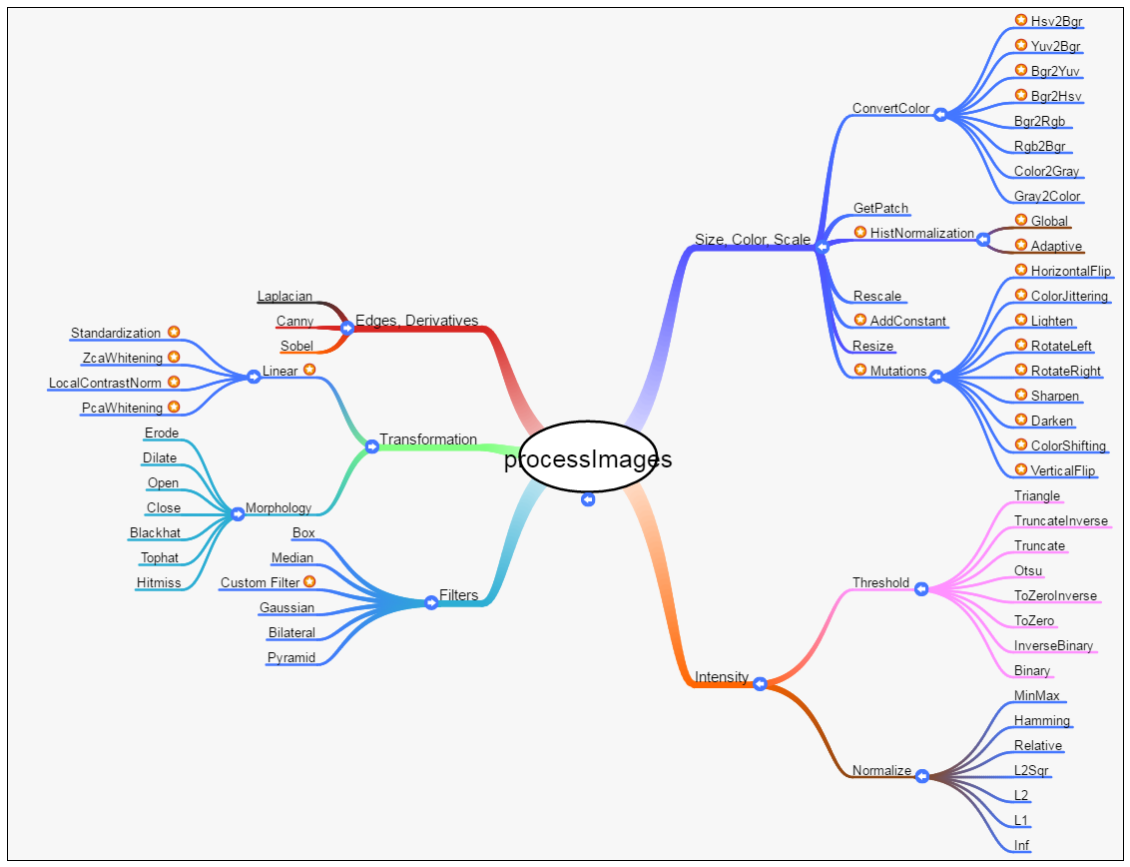

In [8]:
showParticularImage(slidesTable, 0, 2, 1)

## Birds 

In [54]:
s.image.loadImages(
    casout={'name':'birdsTrain', 'replace':True},
    path='/bigdisk/lax/castest/ethem/birds_train',
    labellevels=1,
    distribution={'seed':12345,'type':'RANDOM'},
    recurse=True)

NOTE: Loaded 75 images from /bigdisk/lax/castest/ethem/birds_train into Cloud Analytic Services table birdsTrain.


+ Elapsed: 0.152s, user: 0.031s, sys: 0.184s, mem: 16.6mb

In [10]:
### New features on loadImages: recursive and random write
### Supporting labels end-to-end

In [11]:
originalImages = s.CASTable('birdsTrain')

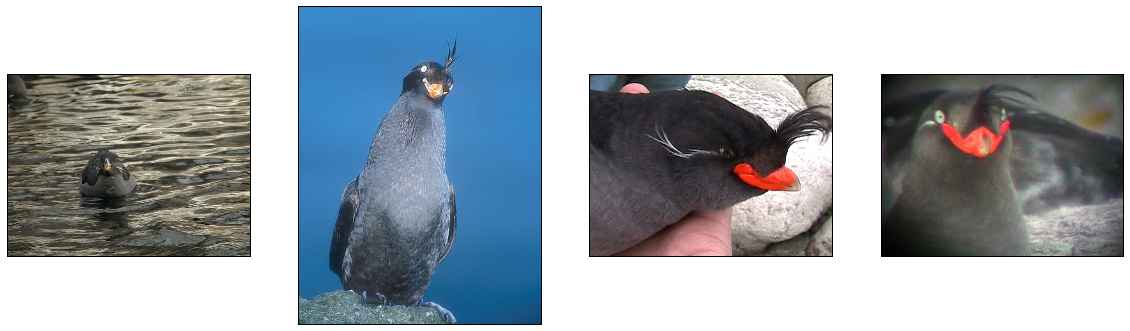

In [12]:
imageShow(originalImages, 0, 4)

### Train a bird classifier

In [55]:
s.image.processImages(
    casout={'name':'birdsTrainResized','replace':True},
    imagetable={'name':'birdsTrain'},
    imagefunctions=[
        {'options':{'w':32,'h':32,'functiontype':'RESIZE'}}
    ]
)
birdsTrain = s.CASTable('birdsTrainResized')

NOTE: Table BIRDSTRAIN contains compressed images.
NOTE: 75 out of 75 images were processed successfully and saved as compressed images to the Cloud Analytic Services table birdsTrainResized.


In [56]:
s.loadactionset('deepLearn')
modelname='birds'
modelweights='birds_weights'
modelweights2='birds_weights2'
modelweights3='birds_weights3'
modelweights4='birds_weights4'
modelweights5='birds_weights5'
modelweights6='birds_weights6'

s.buildModel(model=dict(name=modelname,replace=True),type='CNN')


s.addLayer(model=modelname, name='data', type='input', 
           inputOpts=dict(nchannels=3, width=32, height=32))

s.addLayer(model=modelname, name='conv1', type='convolution',
           convOpts=dict(nFilters=16, width=3, height=3, stride=1), srcLayers=['data'])
s.addLayer(model=modelname, name='conv2', type='convolution',
           convOpts=dict(nFilters=32, width=3, height=3, stride=1), srcLayers=['conv1'])
s.addLayer(model=modelname, name='pool1', type='pooling', 
           poolingOpts=dict(width=2, height=2, stride=2, pool='max'), srcLayers=['conv2'])

#8 fc 64
s.addLayer(model=modelname, name='fc1', type='fullconnect', fcOpts=dict(n=32,act='relu',init='msra'), srcLayers=['pool1'])

#9 output softmax
s.addLayer(model=modelname, name='outlayer', type='output', outputOpts=dict(act='softmax'), srcLayers=['fc1'])

NOTE: Added action set 'deepLearn'.


[OutputCasTables]

                 casLib   Name  Rows  Columns  \
 0  CASUSERHDFS(etfcan)  birds    61        5   
 
                                             casTable  
 0  CASTable(u'birds', caslib=u'CASUSERHDFS(etfcan)')  

+ Elapsed: 0.0138s, user: 0.014s, sys: 0.037s, mem: 6.13mb

In [57]:
nloOpts= dict(miniBatchSize=1, learningRate=0.001, 
              maxEpochs=10, 
              algo='adam', 
              logLevel=2,
              lrpolicy='step',
              stepsize=5,
              gamma=0.1,
              clipgradmin=-100,
              clipgradmax=100)

r = s.dltrain(model=modelname,table=birdsTrain, seed=51321, 
              inputs = ['_image_'], target='_label_',
              modelWeights=dict(name=modelweights, replace=True), 
              nThreads = 32,
              learningOpts=nloOpts)
r.OptIterHistory[['Loss','FitError']].plot(figsize=(12,5))

NOTE:  The sync SGD is started.
NOTE:  The total number of parameters is 267429 .
NOTE:  The approximate memory cost is 156.00 MB.
NOTE:  Epoch           Learning Rate     Loss    Fit Error      Time (s)
NOTE:          0           0.001       16.115     0.7867         0.34
NOTE:          1           0.001        14.75     0.8133         0.32
NOTE:          2           0.001       5.6968     0.6667         0.32
NOTE:          3           0.001       1.2664     0.5467         0.33
NOTE:          4           0.001       1.0687     0.5333         0.32
NOTE:          5          0.0001       0.9621       0.48         0.36
NOTE:          6          0.0001       0.9289     0.4933         0.42
NOTE:          7          0.0001       0.8937     0.4667         0.43
NOTE:          8          0.0001        0.861     0.4533         0.59
NOTE:          9          0.0001        0.834     0.4533         0.39
NOTE:  The optimization reaches the maximum number of epochs.
NOTE:  The total time is       3.8

### Load Test Images and Measure the Accuracy

In [58]:
s.image.loadimages(
    casout={'name':'birdsTest', 'replace':True},
    path='/bigdisk/lax/castest/ethem/birds_test',
    labellevels=1,
    recurse=True)
s.image.processImages(
    casout={'name':'birdsTestResized','replace':True},
    imagetable={'name':'birdsTest'},
    imagefunctions=[
        {'options':{'w':32,'h':32,'functiontype':'RESIZE'}}
    ]
)
testTable = s.CASTable('birdsTestResized')
s.dlscore(model=modelname, initWeights=modelweights, table=testTable)

NOTE: Loaded 73 images from /bigdisk/lax/castest/ethem/birds_test into Cloud Analytic Services table birdsTest.
NOTE: Table BIRDSTEST contains compressed images.
NOTE: 73 out of 73 images were processed successfully and saved as compressed images to the Cloud Analytic Services table birdsTestResized.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read            73
 1  Number of Observations Used            73
 2  Misclassification Error (%)  83.561643836
 3                   Loss Error  1.8394723426

+ Elapsed: 2.48s, user: 2.32s, sys: 5.67s, mem: 1.04e+04mb

### Can We Do Better? 

In [59]:
s.image.summarizeImages(imageTable=birdsTrain)

NOTE: Table BIRDSTRAINRESIZED contains compressed images.
NOTE: 75 out of 75 images were scanned and results were saved to the summary table.


[Summary]

     Column   jpg  minWidth  maxWidth  minHeight  maxHeight  meanWidth  \
 0  _image_  75.0      32.0      32.0       32.0       32.0       32.0   
 
    meanHeight  mean1stChannel  min1stChannel  max1stChannel  mean2ndChannel  \
 0        32.0      128.389479            0.0          255.0      130.999648   
 
    min2ndChannel  max2ndChannel  mean3rdChannel  min3rdChannel  max3rdChannel  
 0            0.0          255.0      121.254779            0.0          255.0  

+ Elapsed: 0.0115s, user: 0.011s, sys: 0.023s, mem: 1.66mb

#### <font color='red'>New Action: summarizeImages</font>

### Global Contrast Normalization (<font color='red'>New Feature</font>)

In [60]:
s.image.processImages(
    casout={'name':'birdsTrainResized2','replace':True},
    imagetable={'name':'birdsTrainResized'},
    imagefunctions=[
        {'options':{'type':'TO_64F','alpha':1,'beta':0, 'functiontype':'RESCALE'}},
        {'options':{'b':-128.389479,'g':-130.999648,'r':-121.254779,'functiontype':'ADD_CONSTANT'}}
    ], decode=True
)

NOTE: Table BIRDSTRAINRESIZED contains compressed images.
NOTE: 75 out of 75 images were processed successfully and saved as decompressed images to the Cloud Analytic Services table birdsTrainResized2.


+ Elapsed: 0.0226s, user: 0.015s, sys: 0.044s, mem: 133mb

In [61]:
birdsTrain2 = s.CASTable('birdsTrainResized2')

NOTE:  The sync SGD is started.
NOTE:  The total number of parameters is 267429 .
NOTE:  The approximate memory cost is 156.00 MB.
NOTE:  Epoch           Learning Rate     Loss    Fit Error      Time (s)
NOTE:          0           0.001       16.075     0.7733         0.35
NOTE:          1           0.001       7.6856     0.6533         0.32
NOTE:          2           0.001       4.6855     0.6933         0.32
NOTE:          3           0.001       0.9879     0.3867         0.31
NOTE:          4           0.001        0.701     0.2933         0.32
NOTE:          5          0.0001       0.5829     0.2667         0.31
NOTE:          6          0.0001       0.5732     0.2533         0.34
NOTE:          7          0.0001       0.5632       0.24         0.31
NOTE:          8          0.0001       0.5544       0.24         0.32
NOTE:          9          0.0001       0.5461     0.2267         0.34
NOTE:  The optimization reaches the maximum number of epochs.
NOTE:  The total time is       3.2

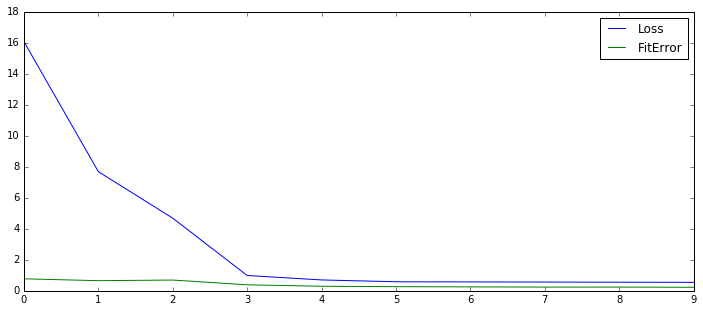

In [62]:
nloOpts= dict(miniBatchSize=1, learningRate=0.001, 
              maxEpochs=10, 
              algo='adam', 
              logLevel=2,
              lrpolicy='step',
              stepsize=5,
              gamma=0.1,
              clipgradmin=-100,
              clipgradmax=100)

r = s.dltrain(model=modelname,table=birdsTrain2, seed=51321, 
              inputs = ['_image_'], target='_label_',
              modelWeights=dict(name=modelweights2, replace=True), 
              nThreads = 32,
              learningOpts=nloOpts)
r.OptIterHistory[['Loss','FitError']].plot(figsize=(12,5))

In [63]:
s.image.processImages(
    casout={'name':'birdsTestResized7','replace':True},
    imagetable={'name':'birdsTestResized'},
    imagefunctions=[
        {'options':{'type':'TO_64F', 'alpha':1,'beta':0, 'functiontype':'RESCALE'}},
        {'options':{'b':-128.389479,'g':-130.999648,'r':-121.254779,'functiontype':'ADD_CONSTANT'}}
    ], decode=True
)
testOther = s.CASTable('birdsTestResized7')
s.dlscore(model=modelname, initWeights=modelweights2, table=testOther)

NOTE: Table BIRDSTESTRESIZED contains compressed images.
NOTE: 73 out of 73 images were processed successfully and saved as decompressed images to the Cloud Analytic Services table birdsTestResized7.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read            73
 1  Number of Observations Used            73
 2  Misclassification Error (%)  75.342465753
 3                   Loss Error  2.2939602746

+ Elapsed: 2.58s, user: 2.41s, sys: 5.83s, mem: 1.04e+04mb

### Can We Further Improve?

In [72]:
s.image.processImages(
    casout={'name':'temp1','replace':True},
    imagetable={'name':'birdsTrain'},
    imagefunctions=[
        {'options':{'w':48,'h':48,'functiontype':'RESIZE'}}
    ]
)

NOTE: Table BIRDSTRAIN contains compressed images.
NOTE: 75 out of 75 images were processed successfully and saved as compressed images to the Cloud Analytic Services table temp1.


+ Elapsed: 0.0688s, user: 0.357s, sys: 0.049s, mem: 132mb

In [73]:
s.image.augmentImages(
    casout={'name':'temp2', 'replace':True},
    imagetable={'name':'temp1'},
    croplist=[
        {'sweepImage':True,
             'width':32,'height':32,'stepsize':16,'outputwidth':32, 'outputheight':32,
         'mutations':{
                'sharpen':True,
                'colorJittering':True,
                'colorShifting':True,
                'horizontalFlip':True
            }
         }
    ], decode=True,
    seed=123456, writeRandomly=True, randomRatio=0.2
)

NOTE: Table TEMP1 contains compressed images.
NOTE: 287 images were produced successfully out of 75 input images and saved as decompressed images to the Cloud Analytic Services table temp2.


+ Elapsed: 0.0225s, user: 0.039s, sys: 0.037s, mem: 133mb

In [74]:
moreBirds = s.CASTable('temp2')

#### <font color='red'>New Action: augmentImages</font>

In [75]:
s.table.loadtable(casout={'name':'birdssample','replace':True},caslib='CASTestTmp',path='birdssample.sashdat')

NOTE: Cloud Analytic Services made the file birdssample.sashdat available as table BIRDSSAMPLE in caslib CASUSERHDFS(etfcan).


[caslib]

 u'CASUSERHDFS(etfcan)'

[tableName]

 u'BIRDSSAMPLE'

[casTable]

 CASTable(u'BIRDSSAMPLE', caslib=u'CASUSERHDFS(etfcan)')

+ Elapsed: 0.0142s, user: 0.006s, sys: 0.022s, mem: 0.379mb

In [76]:
s.image.augmentImages(
    casout={'name':'originalImages2', 'replace':True},
    imagetable={'name':'birdssample'},
    croplist=[
        {'usewholeimage':True,
        'mutations':
             {'verticalFlip':True,
              'horizontalFlip':True,
              'sharpen':True,
              'darken':True,
              'lighten':True,
              'colorJittering':True,
              'colorShifting':True,
              'invertPixels':True,
              'rotateRight':True,
              'rotateLeft':True,
              'pyramidUp':True,
              'pyramidDown':True}
         }
    ])

NOTE: Table BIRDSSAMPLE contains compressed images.
NOTE: 13 images were produced successfully out of 1 input images and saved as compressed images to the Cloud Analytic Services table originalImages2.


+ Elapsed: 0.0323s, user: 0.039s, sys: 0.02s, mem: 132mb

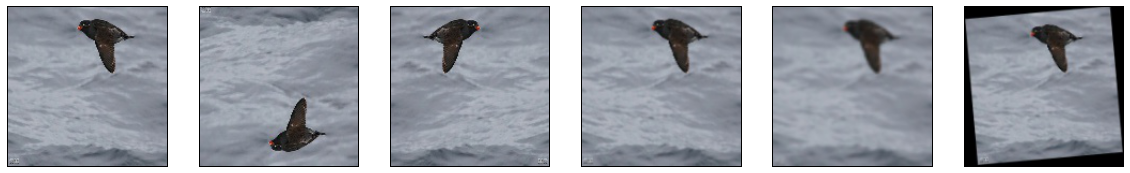

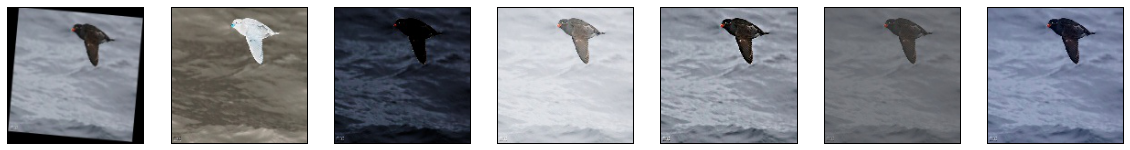

In [77]:
originalImages2 = s.CASTable('originalImages2')
imageShow( originalImages2, 0, 6)
imageShowStartingFrom( originalImages2, 0, 13, 6)

NOTE:  The sync SGD is started.
NOTE:  The total number of parameters is 267429 .
NOTE:  The approximate memory cost is 156.00 MB.
NOTE:  Epoch           Learning Rate     Loss    Fit Error      Time (s)
NOTE:          0           0.001       10.791     0.6725         1.30
NOTE:          1           0.001        2.739      0.662         1.24
NOTE:          2           0.001       1.2863      0.554         1.26
NOTE:          3           0.001       1.0131     0.4774         1.26
NOTE:          4           0.001       0.6869     0.2927         1.30
NOTE:          5          0.0001       0.5414     0.2091         1.27
NOTE:          6          0.0001       0.4371     0.1742         1.25
NOTE:          7          0.0001       0.3855     0.1359         1.24
NOTE:          8          0.0001       0.3452     0.1185         1.27
NOTE:          9          0.0001       0.3079     0.0941         1.28
NOTE:  The optimization reaches the maximum number of epochs.
NOTE:  The total time is      12.6

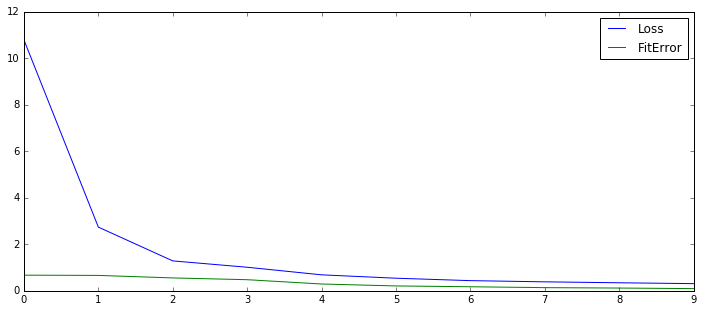

In [78]:
nloOpts= dict(miniBatchSize=1, learningRate=0.001, 
              maxEpochs=10, 
              algo='adam', 
              logLevel=2,
              lrpolicy='step',
              stepsize=5,
              gamma=0.1,
              clipgradmin=-100,
              clipgradmax=100)

r = s.dltrain(model=modelname,table=moreBirds, seed=51321, 
              inputs = ['_image_'], target='_label_',
              modelWeights=dict(name=modelweights3, replace=True), 
              nThreads = 32,
              learningOpts=nloOpts)
r.OptIterHistory[['Loss','FitError']].plot(figsize=(12,5))

In [79]:
s.dlscore(model=modelname, initWeights=modelweights3, table=testTable)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read            73
 1  Number of Observations Used            73
 2  Misclassification Error (%)   63.01369863
 3                   Loss Error  2.2207679103

+ Elapsed: 3.2s, user: 3.02s, sys: 6.42s, mem: 1.04e+04mb

#### So far: New features in processImages, summarizeImages, and augmentImages

In [80]:
s.image.loadimages(casout={'name':'onebird'},path='/bigdisk/lax/castest/ethem/sample')

NOTE: Loaded 1 image from /bigdisk/lax/castest/ethem/sample into Cloud Analytic Services table onebird.


+ Elapsed: 0.0122s, user: 0.003s, sys: 0.02s, mem: 4.43mb

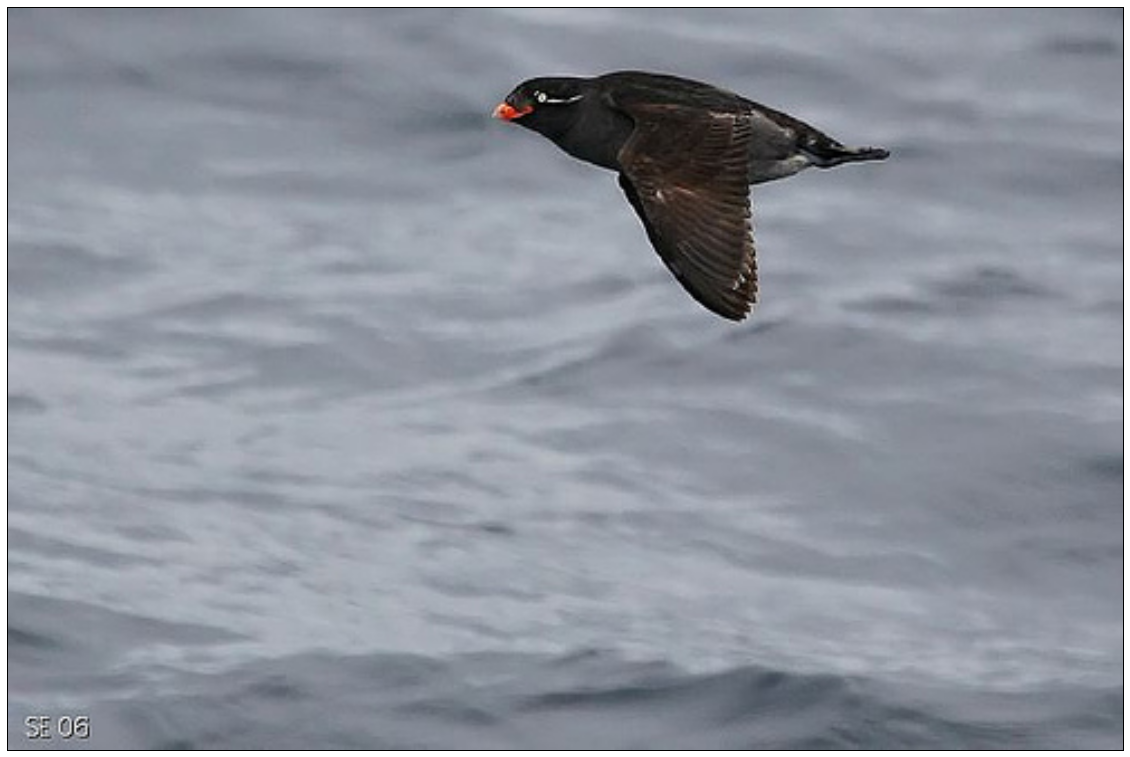

In [81]:
oneBird = s.CASTable('onebird')
imageShow(oneBird, 0, 1)

In [82]:
s.image.augmentImages(
    casout={'name':'onepatch', 'replace':True},
    imagetable={'name':'onebird'},
    croplist=[
        {'x':200, 'y':15, 
         'width':200, 'height':140,
         'outputWidth':200, 'outputHeight':140
        }
    ]
)

NOTE: Table ONEBIRD contains compressed images.
NOTE: 1 images were produced successfully out of 1 input images and saved as compressed images to the Cloud Analytic Services table onepatch.


+ Elapsed: 0.0182s, user: 0.022s, sys: 0.023s, mem: 132mb

NOTE: Loaded 2 images from /bigdisk/lax/castest/demo_ocak18 into Cloud Analytic Services table patches.


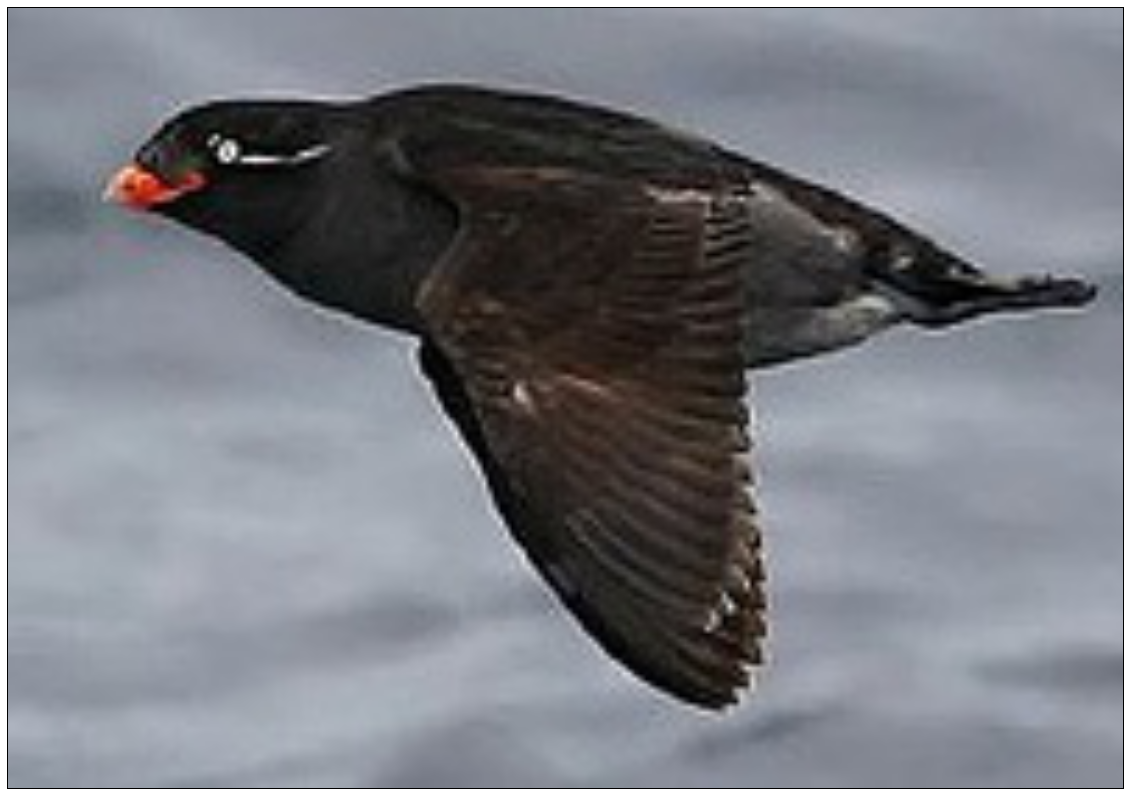

In [83]:
s.image.loadimages(casout={'name':'patches'},path='/bigdisk/lax/castest/demo_ocak18')
onePatch = s.CASTable('patches')
imageShow( onePatch, 0, 1)

In [84]:
s.image.matchImages(
    casout={'name':'results','replace':True},
    imagetable={'name':'birdsTrain'},
    caslib='CASTestTmp',image='demo_ocak18/Crested_Auklet_0001_202650605.jpg',
    highlight=True
)

NOTE: Table BIRDSTRAIN contains compressed images.
NOTE: 75 out of 75 images were identified as having some similarity with the query image. The identified images are saved as compressed images to the Cloud Analytic Services table results.


+ Elapsed: 0.629s, user: 3.23s, sys: 0.447s, mem: 136mb

In [85]:
results = s.CASTable('results')

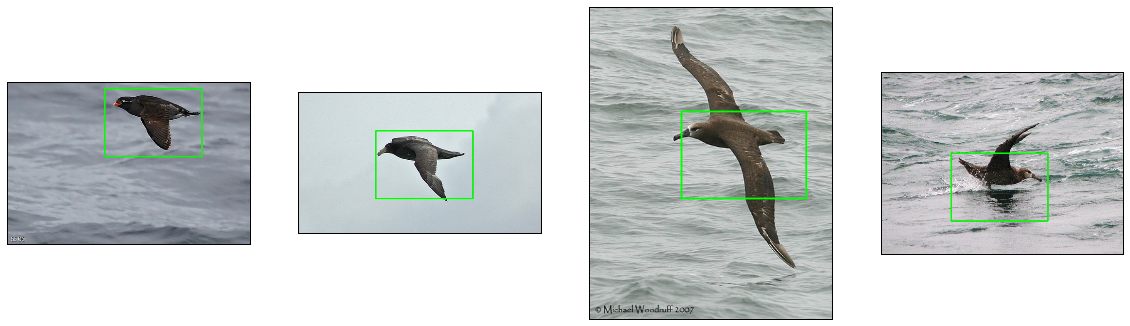

In [86]:
imageShowResults( results, 0, 4)

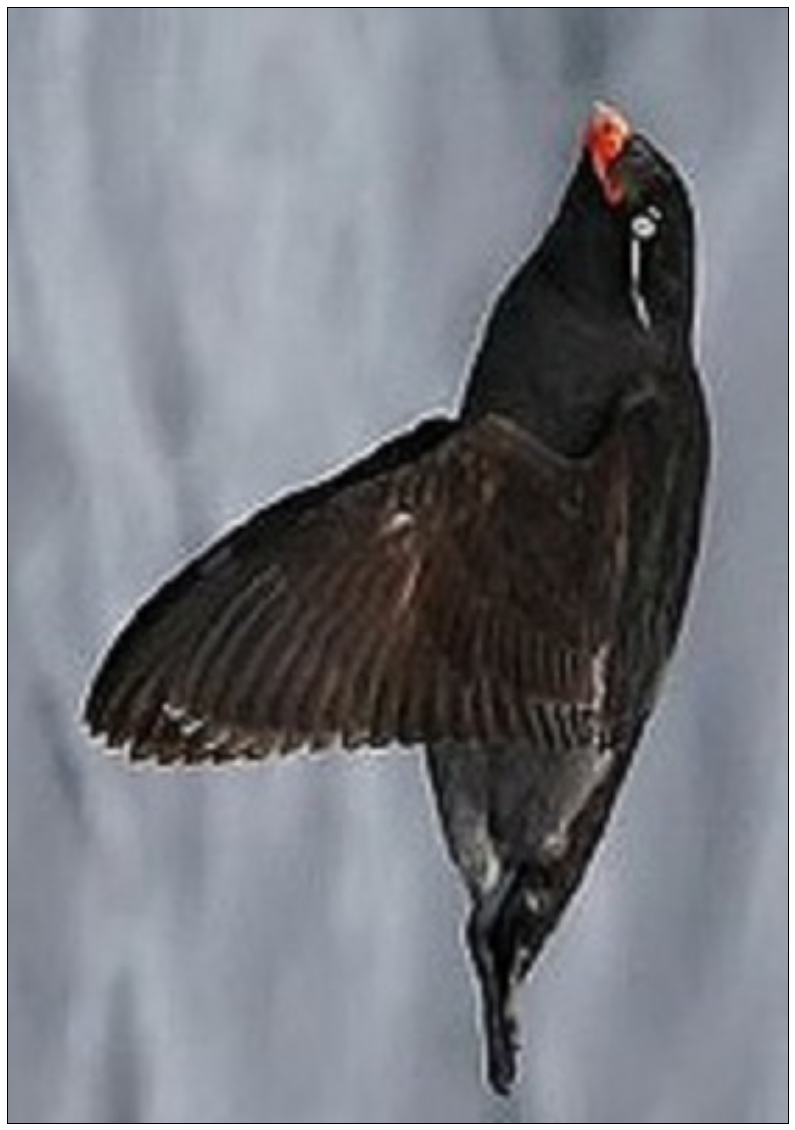

In [87]:
showParticularImage( onePatch, 0, 2, 1)

In [88]:
s.image.matchImages(
    casout={'name':'results2','replace':True},
    imagetable={'name':'birdsTrain'},
    caslib='CASTestTmp',image='demo_ocak18/mutated_Crested_Auklet_0001_202650605.jpg',
    highlight=True,
)

NOTE: Table BIRDSTRAIN contains compressed images.
NOTE: 22 out of 75 images were identified as having some similarity with the query image. The identified images are saved as compressed images to the Cloud Analytic Services table results2.


+ Elapsed: 0.319s, user: 1.53s, sys: 0.212s, mem: 133mb

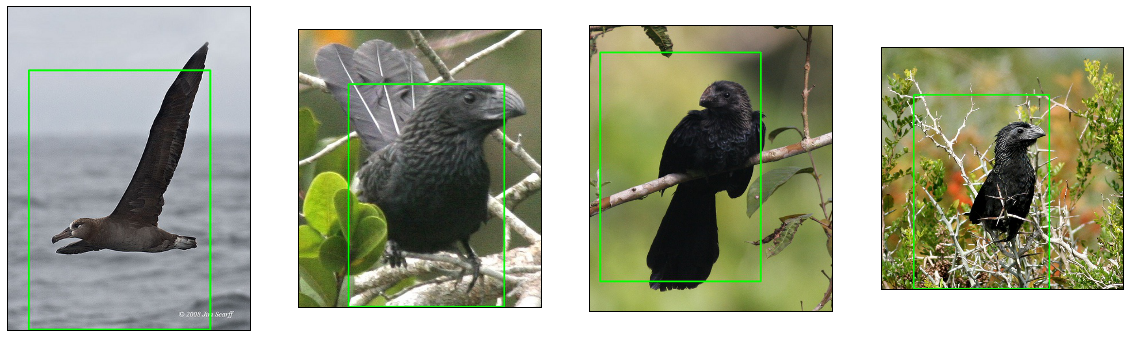

In [89]:
results2 = s.CASTable('results2')
imageShowResults( results2, 0, 4)

In [90]:
s.image.matchImages(
    casout={'name':'results3','replace':True},
    imagetable={'name':'birdsTrain'},
    caslib='CASTestTmp',image='demo_ocak18/mutated_Crested_Auklet_0001_202650605.jpg',
    highlight=True,
    methodoptions={
        'method':'descriptorMatch',
        'desctype':'ORB_BRISK',
        'thresholdratio':0.8
    }
)

NOTE: Table BIRDSTRAIN contains compressed images.
NOTE: 73 out of 75 images were identified as having some similarity with the query image. The identified images are saved as compressed images to the Cloud Analytic Services table results3.


+ Elapsed: 6.2s, user: 37s, sys: 2.46s, mem: 136mb

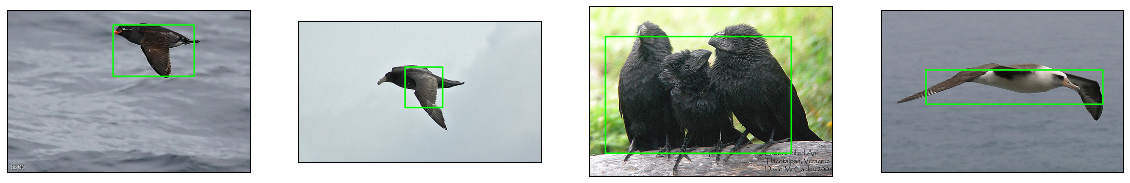

In [91]:
results3 = s.CASTable('results3')
imageShowResults( results3, 0, 4)

### Flatten Image Tables

In [92]:
inputTable = s.CASTable('birdsTestResized7')
numberOfRows = 73
values = inputTable.head(numberOfRows).values
pixelValues = np.zeros((numberOfRows,3072))
for i in range(numberOfRows):
    pixelValues[i] = np.fromstring(values[i][3], np.double)
print pixelValues.shape
nm = ["c%d" %i for i in range(1,pixelValues.shape[1]+1)]
X_df = pd.DataFrame(data=pixelValues, columns = nm)
handler = dmh.PandasDataFrame(X_df)
s.addtable(table='imagesForKmeans', replace=True, **handler.args.addtable) 

(73L, 3072L)


[caslib]

 u'CASUSERHDFS(etfcan)'

[tableName]

 u'IMAGESFORKMEANS'

[casTable]

 CASTable(u'IMAGESFORKMEANS', caslib=u'CASUSERHDFS(etfcan)')

+ Elapsed: 1.36s, user: 0.244s, sys: 0.064s, mem: 45.4mb

In [93]:
imagesF = s.CASTable('imagesForKmeans')

In [94]:
imagesF.fetch(to=2)

[Fetch]

 Selected Rows from Table IMAGESFORKMEANS
 
            c1         c2         c3         c4         c5         c6  \
 0  116.610521  74.000352  48.745221  80.610521  40.000352  14.745221   
 1  -48.389479  -4.999648 -42.254779 -67.389479 -30.999648 -59.254779   
 
           c7         c8         c9        c10    ...          c3063  \
 0  90.610521  50.000352  24.745221  62.610521    ...      74.745221   
 1  -3.389479  22.000352  11.745221  -9.389479    ...      82.745221   
 
        c3064      c3065       c3066       c3067      c3068      c3069  \
 0  94.610521  61.000352   37.745221  106.610521  77.000352  59.745221   
 1 -10.389479  94.000352  110.745221  -62.389479  22.000352   3.745221   
 
         c3070      c3071      c3072  
 0  107.610521  87.000352  73.745221  
 1  -23.389479  28.000352 -31.254779  
 
 [2 rows x 3072 columns]

+ Elapsed: 0.017s, user: 0.028s, sys: 0.012s, mem: 17.8mb

In [95]:
s.loadactionset('clustering')

NOTE: Added action set 'clustering'.


[actionset]

 u'clustering'

+ Elapsed: 0.00553s, user: 0.004s, sys: 0.007s, mem: 0.0854mb

In [96]:
columns = set()
for i in range(1, 3072):
    c = 'c' + str(i)
    columns.add(c)
s.clustering.kclus(nclusters=2,
                   output={'casout':{'name':'clusteredOut', 'replace':True}},
                   display={"names":["modelInfo"]},
                   inputs=columns, table={'name':'imagesForKmeans'})


NOTE: Using SEED=716991048.
NOTE: Running for input data for K 2.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.


[outputSize]

 {u'outputNObs': 73.0, u'outputNVars': 2}

[ModelInfo]

 Model Information
 
               Parameter         Setting
 0  Clustering Algorithm         K-means
 1    Maximum Iterations              10
 2        Stop Criterion  Cluster Change
 3  Stop Criterion Value               0
 4              Clusters               2
 5        Initialization           Forgy
 6                  Seed       716991048
 7              Distance       Euclidean
 8       Standardization            None
 9   Interval Imputation            None

+ Elapsed: 0.315s, user: 0.673s, sys: 0.242s, mem: 292mb

In [97]:


#inputTable = s.CASTable('temp33')
#values = inputTable.head(73).values
#pixelValues = np.zeros((73,3072))
#for i in range(73):
#    pixelValues[i] = np.fromstring(values[i][3], np.double)
#print pixelValues.shape
#nm = ["c%d" %i for i in range(0,pixelValues.shape[1])]
#X_df = pd.DataFrame(data=pixelValues, columns = nm)
#handler = dmh.PandasDataFrame(X_df)
#s.addtable(table='imagesForKmeans', replace=True, **handler.args.addtable) 

s.image.flattenImageTable(casout={'name':'flattenedTable', 'replace':True},
                          imageTable={'name':'birdsTestResized7'})

#transpose, groupChannels


NOTE: Table BIRDSTESTRESIZED7 contains decompressed images.
NOTE: 73 out of 73 images were processed successfully and saved to the Cloud Analytic Services table flattenedTable.


+ Elapsed: 0.0306s, user: 0.038s, sys: 0.045s, mem: 143mb

In [98]:
s.clustering.kclus(
    nclusters=2,
    output={'casout':{'name':'imagesForKmeans2', 'replace':True}},
    inputs=columns, 
    display={"names":["modelInfo"]},
    table={'name':'flattenedTable'})

NOTE: Using SEED=1711180178.
NOTE: Running for input data for K 2.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.


[outputSize]

 {u'outputNObs': 73.0, u'outputNVars': 2}

[ModelInfo]

 Model Information
 
               Parameter         Setting
 0  Clustering Algorithm         K-means
 1    Maximum Iterations              10
 2        Stop Criterion  Cluster Change
 3  Stop Criterion Value               0
 4              Clusters               2
 5        Initialization           Forgy
 6                  Seed      1711180178
 7              Distance       Euclidean
 8       Standardization            None
 9   Interval Imputation            None

+ Elapsed: 0.266s, user: 0.685s, sys: 0.217s, mem: 293mb